In [177]:

#Loading all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import keras
import sys
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import lightgbm as lgb

In [178]:
data = pd.read_csv("Data/demand_dataset.csv",sep = ';', header=0)

In [182]:
data_test=data[(data["material"] == "D13397959") | (data["material"] == "D13384914") | (data["material"] == "D13398000")]

In [160]:
data.head()

# Exploratory Data Analysis

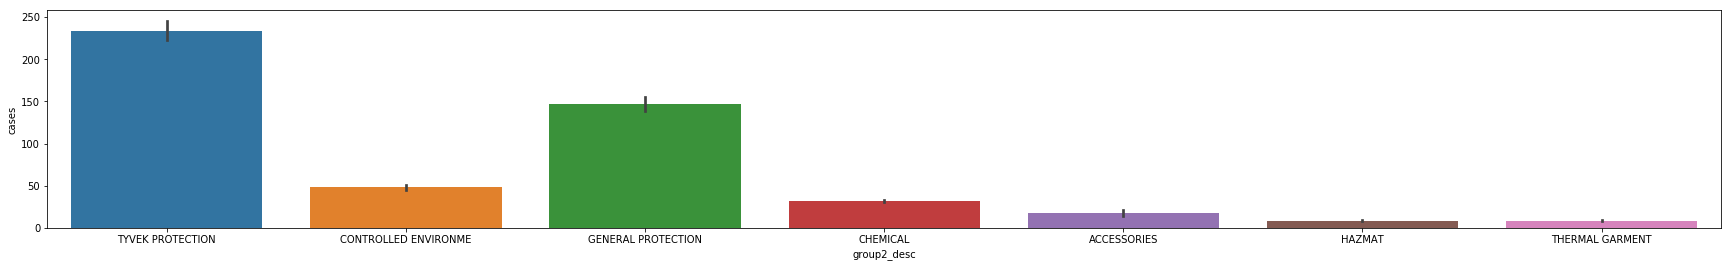

In [12]:
# Plotting Demand per Item Family
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.barplot(x='group2_desc', y='cases', data=data, ax=axis1)

## The above plot shows the demand of products per material family. The average cases ranges somewhere between 0 to 50 with the maximum for the TYVEK PROTECTION and GENERAL PROTECTION item family.¶


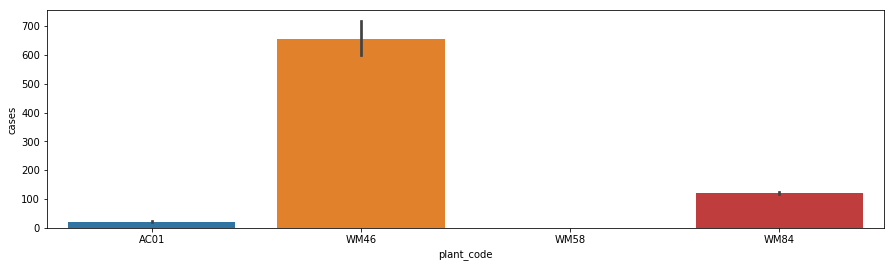

In [13]:
# Plotting Demand per Warehouse
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='plant_code', y='cases', data=data, ax=axis1)

## The bar plot of Total Cases per Warehouse shows that plant WM46 has the maximum demand over other warehouses.¶

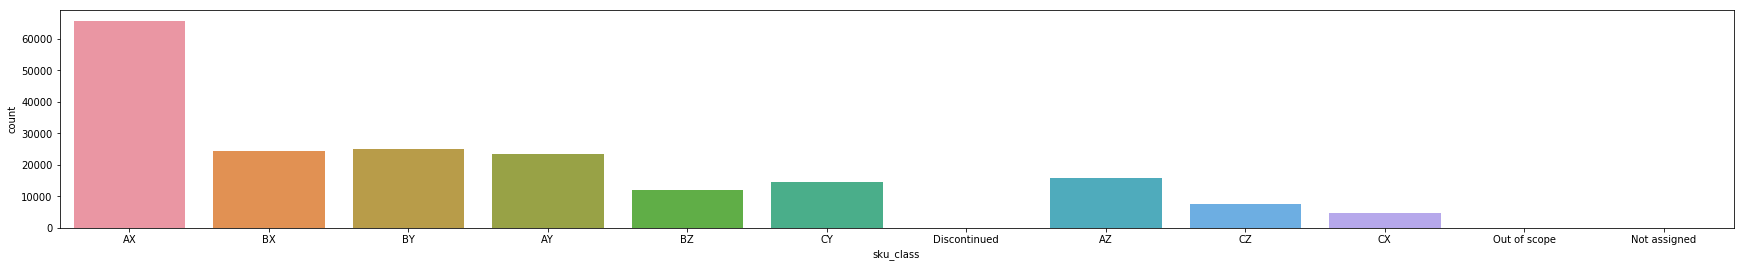

In [17]:
# Plotting SKU's per Sku Class
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x='sku_class', data=data, ax=axis1)

## The bar plot of Total Cases per SKU classes shows that Class AX has the maximum demand over other class.¶

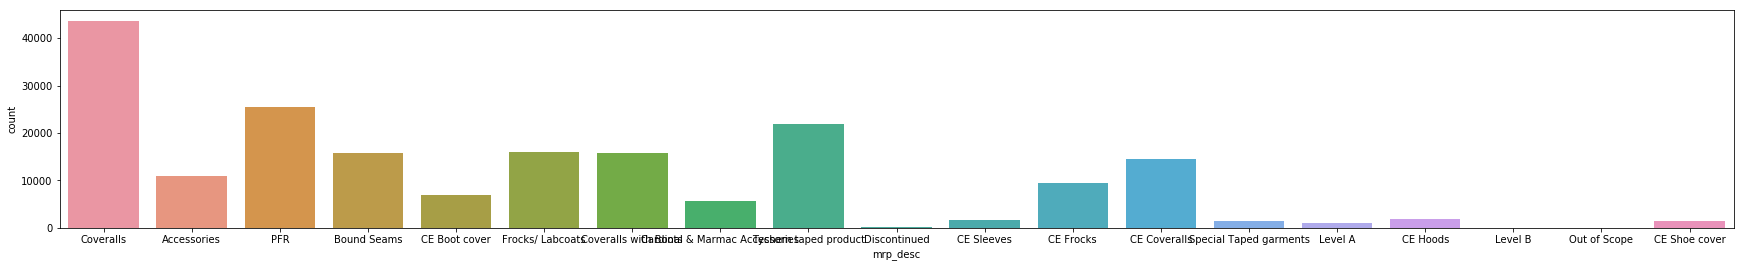

In [19]:
# Plotting SKU's per Sku Class
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x='mrp_desc', data=data, ax=axis1)

# Data Transformation

## One Hot Encoding

In [71]:
data.head()

In [183]:
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['mrp_desc','group2_desc','group3_desc','sku_class','plant_code','material','month','day','group6_desc']

for var in dummy_variables:
    dummy = pd.get_dummies(data_test[var], prefix = var, drop_first = False)
    data_test = pd.concat([data_test, dummy], axis = 1)

data_test = data_test.drop(dummy_variables, axis = 1)

In [162]:
data.head()

## The above dataframe contains data after the one hot encoding technique is applied to the data.

In [ ]:
## Subset on one Material

In [184]:
data_test = data_test.drop(['product_description'], axis = 1)

In [185]:
data_test = data_test.drop(['sales_date'], axis = 1)

In [186]:
data_test = data_test.drop(['year'], axis = 1)

In [188]:
data_test.head()

In [202]:
#train database without demand_cases
data_test = data_test.reset_index(drop=True)  #we reset the index
y = data_test['log_cases']
X = data_test.drop(['log_cases','cases'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (2086, 37)
Shape y : (2086,)


In [203]:
num_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1460, 37)
y_train shape : (1460,)
X_test shape : (626, 37)
y_test shape : (626,)


# Regression Model fitting techniques

## Linear Regression

In [231]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [232]:
# Print the coefficients
print (results.intercept_, results.coef_)

-1.2254858327712608 [ 2.11390904e-05  6.45640479e-03  7.28698869e-02  8.09962364e-04
  3.36454581e-02  9.27255466e-02  4.85722573e-16  7.40648810e-01
 -7.40648810e-01 -2.70616862e-16  4.16333634e-17  0.00000000e+00
 -2.69987455e-02 -2.63517174e-02  5.33504629e-02  3.40918760e-01
  3.99730051e-01 -7.40648810e-01  2.92659609e-01  2.32818667e-01
  8.29481267e-02  1.01444245e-01 -1.53163265e-02 -6.81543063e-02
 -6.57234081e-02 -1.78981604e-01 -1.29075451e-01  3.80999706e-02
 -2.63456120e-02 -2.64373910e-01  2.02798533e-02 -1.23379074e-01
 -2.95958274e-01 -1.67126216e-01  4.06901128e-01  1.59282583e-01
  0.00000000e+00]


In [244]:
import statsmodels.api as sm
import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()

In [234]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_cases   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:31:15   Log-Likelihood:                -2161.1
No. Observations:                1460   AIC:                             4372.
Df Residuals:                    1435   BIC:                             4504.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
value                          2.114e-05   1.26e-06     16.763      0.000    1.87e-05    2.36e-05
f_day                             0.0065      0.003      2.004      0.045       0.000       0.013
adbno                             0.0729      0.015      4.932      0.000       0.044       0.102
service_level                    -0.1377      0.116     -1.183      0.237      -0.366       0.091
est_lead_time                     0.0318      0.003     11.858      0.000       0.027       0.037
IS_HOL                            0.0927      0.160      0.581      0.561      -0.220       0.406
group6_desc_Finished Goods       -0.1505      0.111     -1.355      0.176      -0.368       0.067
mrp_desc_Coveralls                0.6546      0.174      3.764      0.000       0.313       0.996
mrp_desc_Coveralls with Boots    -0.8052      0.067    -12.002      0.000      -0.937      -0.674
group2_desc_TYVEK PROTECTION     -0.1505      0.111     -1.355      0.176      -0.368       0.067
group3_desc_TYVEK PROTECTION     -0.1505      0.111     -1.355      0.176      -0.368       0.067
sku_class_AX                     -0.1505      0.111     -1.355      0.176      -0.368       0.067
plant_code_AC01                  -0.1763      0.369     -0.478      0.633      -0.900       0.547
plant_code_WM46                   0.0212      0.512      0.041      0.967      -0.984       1.026
plant_code_WM84                   0.0046      0.991      0.005      0.996      -1.939       1.948
material_D13384914                0.2979      0.110      2.704      0.007       0.082       0.514
material_D13397959                0.3567      0.076      4.704      0.000       0.208       0.506
material_D13398000               -0.8052      0.067    -12.002      0.000      -0.937      -0.674
month_1                           0.2801      0.084      3.318      0.001       0.115       0.446
month_2                           0.2203      0.085      2.592      0.010       0.054       0.387
month_3                           0.0704      0.093      0.753      0.451      -0.113       0.254
month_4                           0.0889      0.109      0.812      0.417      -0.126       0.304
month_5                          -0.0279      0.092     -0.301      0.763      -0.209       0.154
month_6                          -0.0807      0.101     -0.800      0.424      -0.279       0.117
month_7                          -0.0783      0.102     -0.769      0.442      -0.278       0.121
month_8                          -0.1915      0.089     -2.161      0.031      -0.365      -0.018
month_9                          -0.1416      0.101     -1.399      0.162      -0.340       0.057
month_10                          0.0256      0.092      0.276      0.782      -0.156       0.207
month_11                         -0.0389     

## The Linear regression model gives a R- square value of 0.80¶

## Regularization

In [105]:
# We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [208]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)

0.7866884696537426

## DecisionTree Regressor

In [209]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [210]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

##using a decision tree greatly improves the accurancy of model prediction.

R2 score =  0.8193877073331604 / 1.0
MSE score =  1.0458227171801846 / 0.0


## ExtraTreesRegressor

In [211]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    5.4s finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [212]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8858113862804373 / 1.0
MSE score =  0.661201098263658 / 0.0


## Random Forest Regressor

In [213]:
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [214]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8789902750271389 / 1.0
MSE score =  0.7006982609416811 / 0.0


In [215]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    7.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [216]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  0.8863023346291564 / 1.0
MSE score =  0.6583582965447313 / 0.0


## Gradient Boosting Regressor¶

In [217]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=10,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [218]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.770121315580939 / 1.0
MSE score using Gradient Boosting=  1.3310962770646908 / 0.0


In [ ]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')

In [219]:
gbr = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=150,max_depth=10,min_samples_split=5)


parameters = {'n_estimators': [5,15,150],
              'loss':['ls','huber'],
              'criterion': ['mse'],
              'max_depth': [10,15], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   55.5s finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [220]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.8863023346291564 / 1.0
MSE score using Gradient Boosting=  0.6583582965447313 / 0.0


## Neural Network

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output.

The advantages of Multi-layer Perceptron are:

-- Capability to learn non-linear models.

-- Capability to learn models in real-time (on-line learning) using partial_fit.

In [230]:
# Convert data as np.array
features = np.array(X_train)
#targets = np.array(y_train.reshape(y_train.shape[0],1))
targets = np.array(y_train.values.reshape(y_train.shape[0],1))
features_validation= np.array(X_test)
#targets_validation = np.array(y_test.reshape(y_test.shape[0],1))
targets_validation = np.array(y_test.values.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[1.451846e+04 5.610000e+02 2.000000e+00 9.500000e-01 6.800000e+01
  0.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]
 [3.063776e+04 5.610000e+02 2.000000e+00 9.500000e-01 6.800000e+01
  0.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.

In [222]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1216      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


Step :  0 / 1000
1460/1460 [==============================] - 0s 44us/step
Training MSE: 26.82664616205921
626/626 [==============================] - 0s 29us/step
Validation MSE: 26.10839982078479 

Step :  250 / 1000
1460/1460 [==============================] - 0s 23us/step
Training MSE: 15.933697933040254
626/626 [==============================] - 0s 25us/step
Validation MSE: 15.475590407277068 

Step :  500 / 1000
1460/1460 [==============================] - 0s 28us/step
Training MSE: 6.6471697781183945
626/626 [==============================] - 0s 22us/step
Validation MSE: 6.601346415071823 

Step :  750 / 1000
1460/1460 [==============================] - 0s 19us/step
Training MSE: 5.66271744558256
626/626 [==============================] - 0s 23us/step
Validation MSE: 5.791889003290536 



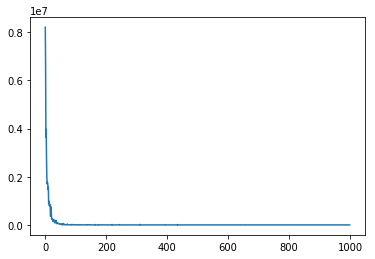

In [223]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
# plot metrics
plt.plot(hist)
plt.show()

In [224]:
y_pred = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score =  -0.0002520774713306029 / 1.0
MSE score =  5.791888968796933 / 0.0


/ds_data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


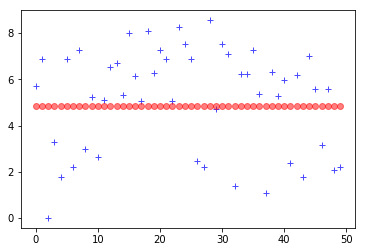

In [225]:
#Lets plot the  first 50 predictions
plt.plot(y_test.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(y_pred[0:50], 'ro', color ='red', alpha=0.5)
plt.show()